# 2D Linear Advection with Finite Differences
## CH EN 6355 - Computational Fluid Dynamics
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

In [4]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['animation.html'] = 'html5'
from matplotlib import cm

In [5]:
nx = 21
ny = 21
Lx = 1.0
Ly = 1.0
x = np.linspace(0,Lx,nx)
y = np.linspace(0,Ly,ny)
dx = Lx/(nx-1)
dy = Ly/(ny-1)
# create a grid of coordinates
xx,yy = np.meshgrid(x,y)

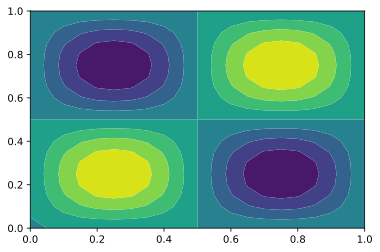

In [6]:
ω0 = 2.0*np.pi
u0 = lambda x,y : np.sin(ω0*x) * np.sin(ω0*y)
# plot the initial condition
plt.contourf(xx,yy,u0(xx,yy))

In [7]:
cx = 1.0
cy = 1.0

dt = 0.001
tend = 0.5 #s
t = 0

cflx = cx * dt/dx
cfly = cy * dt/dy

# setup the initial condition
sol = []
u = np.zeros([ny+2,nx+2]) # we will ghost cells to simplify the implementation of periodic BCs
u[1:-1, 1:-1] = u0(xx,yy)
# set periodic boundaries
u[:,0] = u[:,-3] #x-minus face
u[:,-1] = u[:,2] #x-plus face
u[0,:] = u[-3,:] #y-minus face
u[-1,:] = u[2,:] #y-plus face
sol.append(u)

In [8]:
while t < tend:
    un = sol[-1]
    unew = un.copy()
    unew[1:-1,1:-1] = un[1:-1,1:-1] - cflx * (un[1:-1,1:-1] - un[1:-1,:-2]) - cfly * (un[1:-1,1:-1] - un[:-2,1:-1])
    # set periodic boundaries
    unew[:,0] = unew[:,-3] #x-minus face
    unew[:,-1] = unew[:,2] #x-plus face
    unew[0,:] = unew[-3,:] #y-minus face
    unew[-1,:] = unew[2,:] #y-plus face

    sol.append(unew)
    t += dt

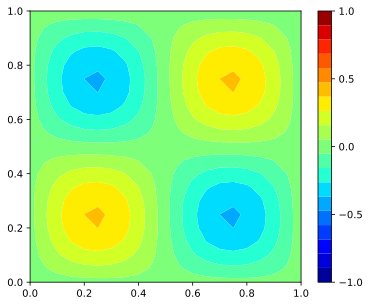

In [9]:
fig = plt.figure(figsize=(6.1,5),facecolor='w')
ims = []
levs = np.linspace(-1,1,20)
i = 0
t = 0.0
for solution in sol:    
    if (i%10==0):        
        im = plt.contourf(xx,yy,solution[1:-1,1:-1],cmap=cm.jet,levels=levs,vmax=1.0,vmin=-1.0)
        ims.append(im.collections)
    i+=1
    t += dt
    
cbar = plt.colorbar()
plt.clim(-1,1)
cbar.set_ticks(np.linspace(-1,1,5))

ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True,repeat_delay=1000)

ani

In [10]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get("https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css")
    return HTML(styles.text)
css_styling()
